# ML Model Performance Evaluation

## 0 - Setup

In [118]:
import matplotlib.image as img # To load the images
import matplotlib.pyplot as plt # To plot the images

import copy  # to copy variables
import numpy as np # To do some calculations
import pandas as pd # To work with dataframes (easier matrices)
from sklearn.ensemble import RandomForestClassifier # The machine learning model 
from os import listdir # To get a list of files in a folder

## 1 - Data Loading and Exploration

Let's start by loading a single flower image to understand the data structure. We'll examine how images are stored and what information they contain.

We'll use matplotlib's imread function to load the image into memory.

In [ ]:
# provide the location of image for reading
bloem1 = img.imread("datasets/flower_training_set/0003.png");

Now let's display the image we just loaded to verify it was read correctly:

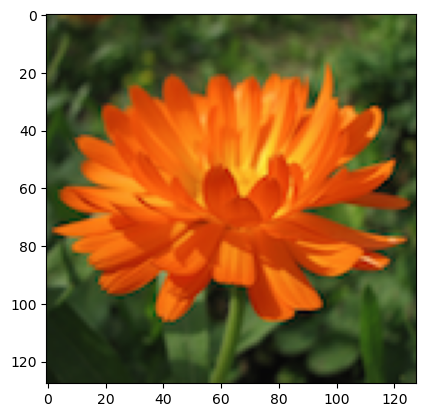

In [ ]:
plt.imshow(bloem1)

Ok, it's clear we loaded the image correctly. It is now stored in the 'bloem1' object. Let's look at the shape of the image we just read.

Let's examine the dimensions and structure of our image data:

In [ ]:
bloem1.shape

(128, 128, 4)

This is interesting. The shape of the data object is 128x128x4. It seems that the size of the image is 128 by 128 pixels. The 4 indicates there are 4 layers in the data. Most likely that is 3 for color and 1 for something else. Let's plot each layer individually and see what we have.

Note that python indexes start at 0. So the first layer has index 0, the second layer index 1, etc.

Now let's explore each color layer separately to understand what information each contains:

layer 1:


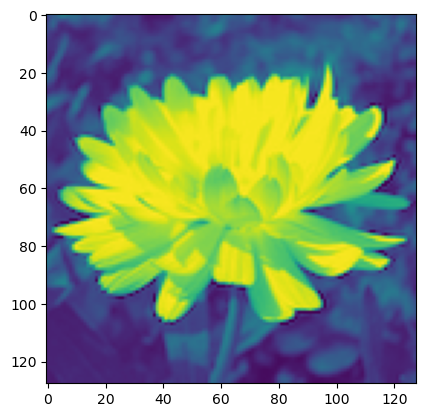

layer 2:


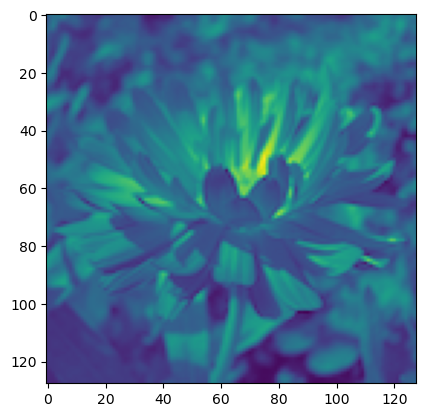

layer 3:


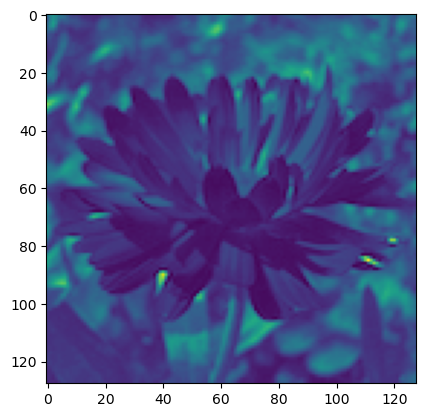

layer 4:


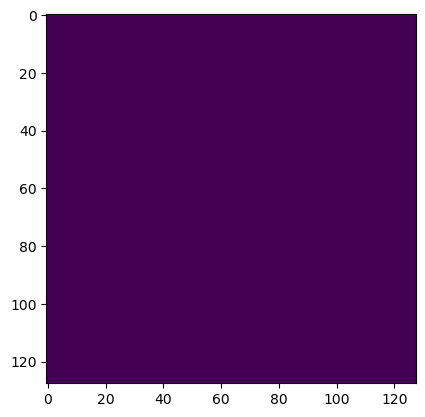

In [ ]:
# Let's look at the 4 layers
layer1 = bloem1[:,:,0]
layer2 = bloem1[:,:,1]
layer3 = bloem1[:,:,2]
layer4 = bloem1[:,:,3]

for i in range(0,4):
    print(f"layer {i+1}:")
    plt.imshow(bloem1[:,:,i])
    plt.show()

Ok, there a number of things we can see. 
- Firstly, layer4 has the same value for everything. Most likely the layer 4 has something to do with the brigtness of the image or something. Whatever is is, we clearly do not need it. 
- secondly, all layers seem to be composed of blue green and yellow. What's that all about? Most likely it is to do with the default of imshow, where it will show large values with a broght yellow color, and smaller values with a darker green/blue color. How to test this? Maybe we can take the original image and put some layers to zero to see what happens.

Let's test our hypothesis about RGB layers by isolating each color channel. We'll create copies of the image and set two layers to zero to see only one color at a time:

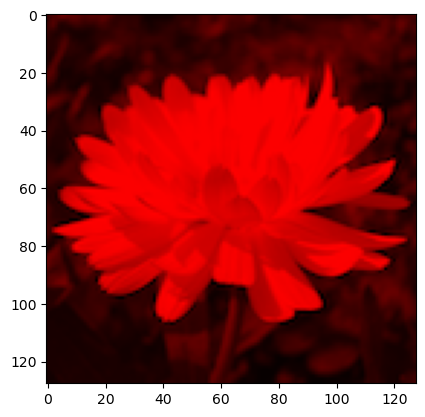

In [ ]:
# Layer 1 (Layer 2 and 3 zero)
bloem1_copy = copy.deepcopy(bloem1)

bloem1_copy[:,:,1] = np.zeros((128, 128)) # set layer 2 to be all zeros
bloem1_copy[:,:,2] = np.zeros((128, 128)) # set layer 3 to be all zeros

plt.imshow(bloem1_copy)

Ok, now we are getting somewhere. We put layer 2 and 3 (index 1 and 2 remember) to zero and the final image is all red. We can conclude that layer 1 contains the red. So let's for now assume that the first layer is indeed red and the following layers are green and blue (RGB). Let's check all the layers!

Now let's test the green layer by isolating it:

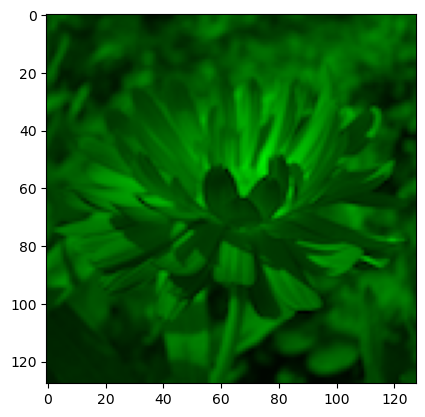

In [ ]:
# Layer 2 (layer 1 and 3 zero)
bloem1_copy = copy.deepcopy(bloem1)
bloem1_copy[:,:,0] = np.zeros((128, 128)) # set layer 2 to be all zeros
bloem1_copy[:,:,2] = np.zeros((128, 128)) # set layer 3 to be all zeros
plt.imshow(bloem1_copy)

And finally, let's test the blue layer:

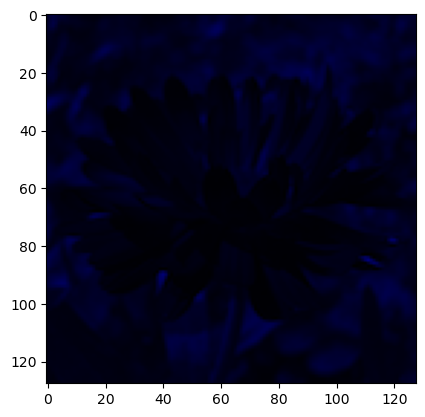

In [ ]:
# Layer 3 (layer 1 and 2 zero)
bloem1_copy = copy.deepcopy(bloem1)
bloem1_copy[:,:,0] = np.zeros((128, 128)) # set layer 1 to be all zeros
bloem1_copy[:,:,1] = np.zeros((128, 128)) # set layer 2 to be all zeros
plt.imshow(bloem1_copy)

## 2 - Data Processing

### Calculating features

We want to quantify our image in  few variables which we have to calculate. In class we saw the sum example. So let's calculate the sum for each color, and let's see how we would be able to gather that data up in a matrix like structure (ndarray in python).

Now we'll extract features from the image by calculating color sums. This is a simple feature engineering approach where we reduce each image to three numerical values representing the total intensity of each color channel:

In [126]:
RedSum = layer1.sum()
GreenSum = layer2.sum()
BlueSum = layer3.sum()

RGB_sums = [[RedSum, GreenSum, BlueSum]]

Let's check the results of our feature calculation:

In [127]:
RGB_sums

[[np.float32(8152.263), np.float32(5193.024), np.float32(1677.9609)]]

In [128]:
test = np.append(RGB_sums, RGB_sums, axis = 0)

In [129]:
test

array([[8152.263 , 5193.024 , 1677.9609],
       [8152.263 , 5193.024 , 1677.9609]], dtype=float32)

### Making the data matrix; x for the ML Model...

Now let's get a list of all training image files so we can process them systematically:

In [130]:
training_files = listdir("datasets/flower_training_set")
training_files

['0003.png',
 '0039.png',
 '0045.png',
 '0050.png',
 '0074.png',
 '0081.png',
 '0087.png',
 '0092.png',
 '0094.png',
 '0101.png',
 '0102.png',
 '0113.png',
 '0132.png',
 '0139.png',
 '0145.png',
 '0157.png',
 '0166.png',
 '0177.png',
 '0193.png',
 '0210.png']

Now we'll process all training images systematically. This loop will extract RGB sum features from every image in our training set:

In [131]:
RGB_Sum_results = np.empty((0, 3), float) # initialization of empty ndarray

for file in training_files:
    flower_filepath = "datasets/flower_training_set/" + file
    print("processing " + flower_filepath)
    
    bloem = img.imread(flower_filepath)
    
    RED_layer = bloem[:,:,0]
    GREEN_layer = bloem[:,:,1]
    BLUE_layer = bloem[:,:,2]
    
    RedSum = RED_layer.sum()
    GreenSum = GREEN_layer.sum()
    BlueSum = BLUE_layer.sum()
    
    RGB_sum = [[RedSum, GreenSum, BlueSum]]
    print(RGB_sum, end = "\n \n") # the two times '\n' is to leave space between each print output. It is just to get a nice looking output
          
    RGB_Sum_results = np.append(RGB_Sum_results, RGB_sum, axis = 0) 

RGB_Sum_results    

processing datasets/flower_training_set/0003.png
[[np.float32(8152.263), np.float32(5193.024), np.float32(1677.9609)]]
 
processing datasets/flower_training_set/0039.png
[[np.float32(8790.212), np.float32(6647.957), np.float32(2448.0159)]]
 
processing datasets/flower_training_set/0045.png
[[np.float32(9239.98), np.float32(2846.6316), np.float32(3180.9258)]]
 
processing datasets/flower_training_set/0050.png
[[np.float32(7923.353), np.float32(4252.7925), np.float32(3566.3257)]]
 
processing datasets/flower_training_set/0074.png
[[np.float32(8076.663), np.float32(7806.7764), np.float32(6063.553)]]
 
processing datasets/flower_training_set/0081.png
[[np.float32(10759.781), np.float32(6068.6396), np.float32(5549.6553)]]
 
processing datasets/flower_training_set/0087.png
[[np.float32(7562.51), np.float32(5420.949), np.float32(1850.612)]]
 
processing datasets/flower_training_set/0092.png
[[np.float32(9131.231), np.float32(9299.07), np.float32(6491.373)]]
 
processing datasets/flower_traini

array([[ 8152.26318359,  5193.02392578,  1677.9609375 ],
       [ 8790.21191406,  6647.95703125,  2448.01586914],
       [ 9239.98046875,  2846.6315918 ,  3180.92578125],
       [ 7923.35302734,  4252.79248047,  3566.32568359],
       [ 8076.66308594,  7806.77636719,  6063.55322266],
       [10759.78125   ,  6068.63964844,  5549.65527344],
       [ 7562.50976562,  5420.94921875,  1850.61206055],
       [ 9131.23144531,  9299.0703125 ,  6491.37304688],
       [ 8442.48632812,  4852.8984375 ,  1348.87451172],
       [ 8451.28710938,  5859.70996094,  4424.58837891],
       [ 6278.52148438,  4640.98046875,  1512.2512207 ],
       [ 8359.7734375 ,  5775.87109375,  1920.38452148],
       [ 7193.45898438,  5351.59228516,  2069.31005859],
       [ 7557.49902344,  5959.45507812,  1874.99633789],
       [ 8068.09863281,  6100.84716797,  2251.72949219],
       [ 6708.38427734,  6627.96875   ,  2153.18847656],
       [ 9487.12109375,  8097.04345703,  3403.50219727],
       [ 8599.38476562,  6738.2

### Building the outcome vector (flower type for each file); y of our ML Model..


Let's load the metadata that contains the flower labels (rose or calendula) for each image:

In [132]:
flower_metadata = pd.read_csv("datasets/all_flower_labels.csv", header = 0, sep = ";")
flower_metadata.head()

,Unnamed: 0,file,label,name
0,3,0003.png,2,calendula
1,6,0006.png,1,rose
2,16,0016.png,1,rose
3,21,0021.png,2,calendula
4,27,0027.png,2,calendula


Create a dataframe with our training file names to match with the labels:

In [133]:
outcome_vector = pd.DataFrame({"training_file" : training_files})
outcome_vector.head()

,training_file
0,0003.png
1,0039.png
2,0045.png
3,0050.png
4,0074.png


Now merge the file names with their corresponding labels from the metadata:

In [134]:
outcome_data = pd.merge(outcome_vector, flower_metadata, left_on = 'training_file', right_on = 'file')
outcome_data.head()

,training_file,Unnamed: 0,file,label,name
0,0003.png,3,0003.png,2,calendula
1,0039.png,39,0039.png,2,calendula
2,0045.png,45,0045.png,1,rose
3,0050.png,50,0050.png,1,rose
4,0074.png,74,0074.png,1,rose


Combine the labels with our RGB feature data to create the complete training dataset:

In [135]:
df_full = pd.merge(outcome_data, pd.DataFrame(RGB_Sum_results, columns = ['RedSum', 'GreenSum', 'BlueSum']), left_index = True, right_index = True )

In [136]:
df_full.head()

,training_file,Unnamed: 0,file,label,name,RedSum,GreenSum,BlueSum
0,0003.png,3,0003.png,2,calendula,8152.263184,5193.023926,1677.960938
1,0039.png,39,0039.png,2,calendula,8790.211914,6647.957031,2448.015869
2,0045.png,45,0045.png,1,rose,9239.980469,2846.631592,3180.925781
3,0050.png,50,0050.png,1,rose,7923.353027,4252.792480,3566.325684
4,0074.png,74,0074.png,1,rose,8076.663086,7806.776367,6063.553223


Finally, let's separate our features (X) and target labels (y) for machine learning:

In [137]:
x_train = df_full[['RedSum', 'GreenSum', 'BlueSum']]
y_train = df_full['name']

## 3 - Model Building

This section involves creating and training machine learning models that will be used for performance evaluation and comparison.

Now we'll create our machine learning model. We'll use a Random Forest classifier, which combines multiple decision trees to make predictions:

In [138]:
## Step 1: defining the model
ML_model = RandomForestClassifier(n_estimators=100)

Now let's train our model using the training data we prepared:

In [139]:
## Step 2: training the model with the data we prepared

ML_model.fit(x_train, y_train)

RandomForestClassifier()


## 4 - Evaluation

This section focuses on evaluating model performance using various metrics, visualization techniques, and comparison methods to assess and compare different machine learning models.

### On training set

Let's evaluate how well our model performs on the training data. This will show us predictions and probabilities for data the model has already seen:

In [140]:
y_pred=ML_model.predict(x_train)

probs = pd.DataFrame(ML_model.predict_proba(x_train))
y_probs = probs.iloc[:,1]

prediction_check = pd.DataFrame({'True label':y_train,
                                'Predicted label': y_pred,
                                'Probabilities':y_probs})
prediction_check

,True label,Predicted label,Probabilities
0,calendula,calendula,0.02
1,calendula,calendula,0.22
2,rose,rose,0.88
3,rose,rose,0.84
4,rose,rose,0.92
5,rose,rose,0.89
6,calendula,calendula,0.02
7,rose,rose,0.88
8,calendula,calendula,0.08
9,rose,rose,0.87


### On test set:

Now let's test our model on completely new data that it hasn't seen before. This is the true test of model performance:

In [141]:
test_files = listdir("datasets/flower_test_set")

RGB_Test_results = np.empty((0, 3), float) # initialization of empty ndarray
for file in test_files:
    flower_filepath = "datasets/flower_test_set/" + file
    print("processing " + flower_filepath)
    
    bloem = img.imread(flower_filepath)
    
    RED_layer = bloem[:,:,0]
    GREEN_layer = bloem[:,:,1]
    BLUE_layer = bloem[:,:,2]
    
    RedSum = RED_layer.sum()
    GreenSum = GREEN_layer.sum()
    BlueSum = BLUE_layer.sum()
    
    RGB_sum = [[RedSum, GreenSum, BlueSum]]
    print(RGB_sum, end = "\n \n") # the two times '\n' is to leave space between each print output. It is just to get a nice looking output
          
    RGB_Test_results = np.append(RGB_Test_results, RGB_sum, axis = 0) 

RGB_Test_results

processing datasets/flower_test_set/0006.png
[[np.float32(7731.9453), np.float32(6704.7886), np.float32(5322.922)]]
 
processing datasets/flower_test_set/0016.png
[[np.float32(11879.863), np.float32(6369.718), np.float32(6365.169)]]
 
processing datasets/flower_test_set/0021.png
[[np.float32(8142.6943), np.float32(5617.3022), np.float32(2015.3923)]]
 
processing datasets/flower_test_set/0027.png
[[np.float32(8487.776), np.float32(4844.777), np.float32(1975.859)]]
 
processing datasets/flower_test_set/0042.png
[[np.float32(5232.663), np.float32(5255.4434), np.float32(3731.5728)]]
 
processing datasets/flower_test_set/0061.png
[[np.float32(9384.533), np.float32(6549.616), np.float32(2677.3647)]]
 
processing datasets/flower_test_set/0062.png
[[np.float32(10238.11), np.float32(3963.5962), np.float32(4254.6475)]]
 
processing datasets/flower_test_set/0095.png
[[np.float32(8263.808), np.float32(4711.8906), np.float32(3554.6943)]]
 
processing datasets/flower_test_set/0105.png
[[np.float32(9

array([[ 7731.9453125 ,  6704.78857422,  5322.921875  ],
       [11879.86328125,  6369.71777344,  6365.16894531],
       [ 8142.69433594,  5617.30224609,  2015.39233398],
       [ 8487.77636719,  4844.77685547,  1975.85900879],
       [ 5232.66308594,  5255.44335938,  3731.57275391],
       [ 9384.53320312,  6549.61621094,  2677.36474609],
       [10238.11035156,  3963.59619141,  4254.64746094],
       [ 8263.80761719,  4711.890625  ,  3554.69433594],
       [ 9621.31054688, 10350.77734375,  6723.54541016],
       [ 7250.29785156,  4769.97265625,  2068.38452148],
       [ 8250.38867188,  5569.20019531,  1732.52954102],
       [ 8312.78417969,  6680.81640625,  2771.30615234],
       [ 7245.52148438,  5844.22363281,  1996.15698242],
       [ 5375.45507812,  7575.02734375,  2753.56103516],
       [ 5822.90234375,  8634.64746094,  2456.07080078],
       [ 6155.57617188,  5136.74121094,  1777.22363281],
       [ 6377.36132812,  5807.40820312,  3199.67480469],
       [10324.63964844,  5980.5

Create labels for our test data by matching filenames with the metadata:

In [142]:
test_labels = pd.DataFrame({"test_file" : test_files})

test_data = pd.merge(test_labels, flower_metadata, left_on = 'test_file', right_on = 'file')
test_data.head()

,test_file,Unnamed: 0,file,label,name
0,0006.png,6,0006.png,1,rose
1,0016.png,16,0016.png,1,rose
2,0021.png,21,0021.png,2,calendula
3,0027.png,27,0027.png,2,calendula
4,0042.png,42,0042.png,1,rose


Make predictions on our test data and compare with the true labels:

In [143]:
y_test=ML_model.predict(RGB_Test_results)
probs = pd.DataFrame(ML_model.predict_proba(RGB_Test_results))
y_probs = probs.iloc[:,1]


test_predictions_check = pd.DataFrame({'test file': test_files,
                                       'True label':test_data['name'],
                                       'Predicted label': y_test,
                                      'Probs':y_probs})
test_predictions_check

c:\Users\billo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\billo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,test file,True label,Predicted label,Probs
0,0006.png,rose,rose,0.86
1,0016.png,rose,rose,0.86
2,0021.png,calendula,calendula,0.06
3,0027.png,calendula,calendula,0.16
4,0042.png,rose,rose,0.64
5,0061.png,calendula,calendula,0.34
6,0062.png,rose,rose,0.91
7,0095.png,rose,rose,0.61
8,0105.png,rose,rose,0.79
9,0106.png,calendula,calendula,0.12


Now we'll calculate performance metrics across different probability thresholds. This analysis helps us understand how changing the decision threshold affects our model's sensitivity, specificity, and precision:

In [144]:
rsult = []

for i in range(0, 101, 1):
    
    threshold = i/100
    TP = test_predictions_check.loc[np.logical_and(test_predictions_check['Probs'] >= threshold, 
                                                  test_predictions_check['True label'] == 'rose')].shape[0]

    TN = test_predictions_check.loc[np.logical_and(test_predictions_check['Probs'] < threshold, 
                                                  test_predictions_check['True label'] == 'calendula')].shape[0]


    FP = test_predictions_check.loc[np.logical_and(test_predictions_check['Probs'] >= threshold, 
                                                  test_predictions_check['True label'] == 'calendula')].shape[0]

    FN = test_predictions_check.loc[np.logical_and(test_predictions_check['Probs'] < threshold, 
                                                  test_predictions_check['True label'] == 'rose')].shape[0]

    sensitivity_recall = TP/(TP+FN)
    
    if TN + FP > 0:
        specificity = TN / (TN + FP)
    else:
        specificity = np.nan
    
    if TP + FP > 0:
        precision = TP / (TP + FP)
    else:
        precision = np.nan

    rsult.append(pd.DataFrame({'threshold': threshold,
                         'sensitivity_recall':sensitivity_recall,
                         'specificity': specificity,
                         'precision':precision}, index=[0]))



result = pd.concat(rsult, ignore_index = True)

Let's examine our calculated performance metrics:

In [145]:
result

,threshold,sensitivity_recall,specificity,precision
0,0.00,1.0,0.000000,0.526316
1,0.01,1.0,0.000000,0.526316
2,0.02,1.0,0.000000,0.526316
3,0.03,1.0,0.111111,0.555556
4,0.04,1.0,0.111111,0.555556
...,...,...,...,...
96,0.96,0.0,1.000000,NaN
97,0.97,0.0,1.000000,NaN
98,0.98,0.0,1.000000,NaN
99,0.99,0.0,1.000000,NaN


Now let's create an ROC curve by plotting sensitivity (true positive rate) vs (1-specificity). This shows the trade-off between correctly identifying roses and incorrectly classifying calendulas:

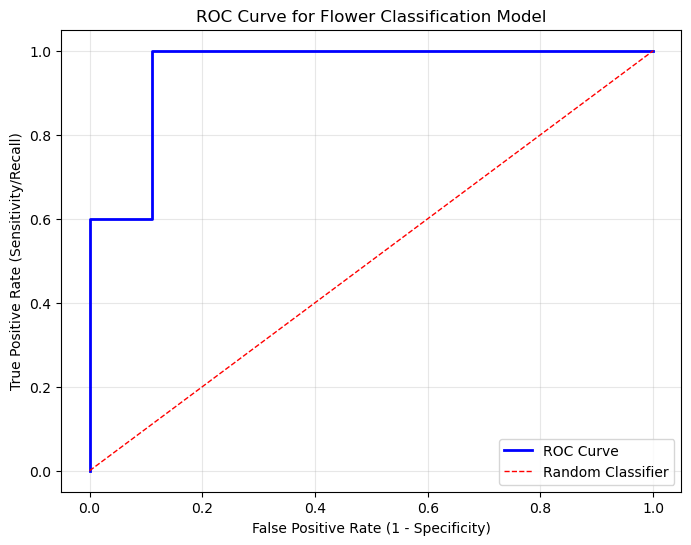

In [159]:
# Create a proper ROC curve with labels and formatting
plt.figure(figsize=(8, 6))
plt.plot(1-result['specificity'], result['sensitivity_recall'], 'b-', linewidth=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('ROC Curve for Flower Classification Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### ROC Curve Interpretation

The ROC curve shows how well our model can distinguish between roses and calendulas:

- **Area Under the Curve (AUC)**: The closer the curve is to the top-left corner, the better the model performance
- **Diagonal line**: Represents random guessing (50% accuracy)
- **Our curve**: Shows that our model performs significantly better than random chance
- **Trade-off**: As we increase sensitivity (catching more roses), we also increase false positives (incorrectly classifying calendulas as roses)

A perfect classifier would go straight up the left side and then across the top (AUC = 1.0).

Let's also plot sensitivity vs specificity to see another perspective on model performance:

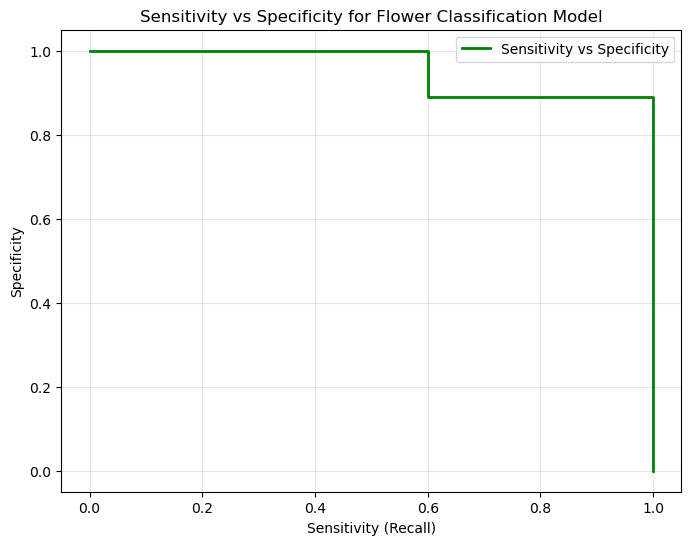

In [160]:
# Create a properly formatted Sensitivity vs Specificity plot
plt.figure(figsize=(8, 6))
plt.plot(result['sensitivity_recall'], result['specificity'], 'g-', linewidth=2, label='Sensitivity vs Specificity')
plt.xlabel('Sensitivity (Recall)')
plt.ylabel('Specificity')
plt.title('Sensitivity vs Specificity for Flower Classification Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Sensitivity vs Specificity Interpretation

This plot shows the relationship between two important metrics:

- **Sensitivity (Recall)**: How well we identify roses when they are actually roses (True Positive Rate)
- **Specificity**: How well we identify calendulas when they are actually calendulas (True Negative Rate)
- **The curve shape**: Shows how these metrics change as we adjust the probability threshold
- **Ideal scenario**: We want both sensitivity and specificity to be high (top-right corner)
- **Real-world trade-off**: Usually increasing one decreases the other - we need to find the optimal balance

The shape of this curve helps us understand where the optimal threshold might be for our specific use case.

Finally, let's create a precision-recall curve. This shows the relationship between precision (positive predictive value) and recall (sensitivity), which is particularly useful for understanding model performance when classes might be imbalanced:

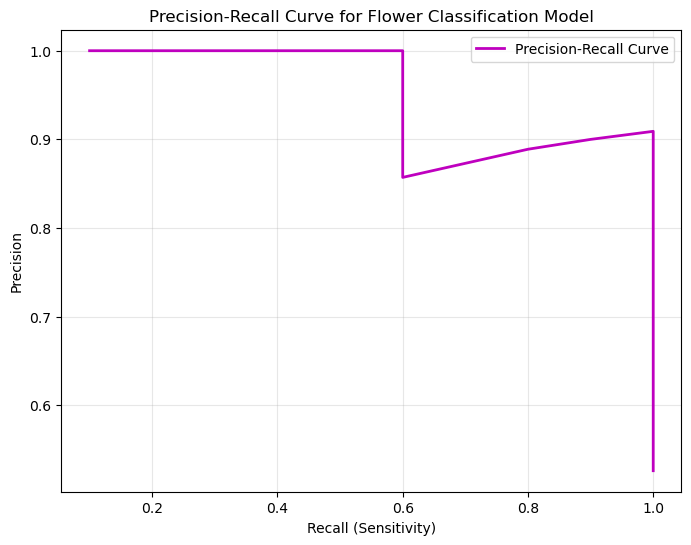

In [161]:
# Create a properly formatted Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(result['sensitivity_recall'], result['precision'], 'm-', linewidth=2, label='Precision-Recall Curve')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Flower Classification Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Precision-Recall Curve Interpretation

The Precision-Recall curve is especially useful when we have imbalanced classes or when false positives are costly:

- **Precision**: Of all the flowers we predicted as roses, how many were actually roses?
- **Recall (Sensitivity)**: Of all the actual roses, how many did we correctly identify?
- **High precision**: Few false positives (we rarely misclassify calendulas as roses)
- **High recall**: Few false negatives (we catch most of the actual roses)
- **The trade-off**: Higher recall often comes at the cost of lower precision
- **Curve shape**: A curve closer to the top-right indicates better performance

This curve helps us choose thresholds based on whether we prioritize avoiding false positives (high precision) or catching all true positives (high recall).

### Summary of Model Performance

Based on our analysis, we can conclude:

**What we learned:**
1. **Feature Engineering**: Simple RGB color sums can be effective features for distinguishing between flower types
2. **Model Performance**: Our Random Forest classifier performs significantly better than random guessing
3. **Performance Metrics**: Different metrics (ROC, Precision-Recall) give us different perspectives on model quality

**Key Insights:**
- The model shows good discrimination ability between roses and calendulas
- The choice of probability threshold affects the balance between sensitivity, specificity, and precision
- Visual performance curves help us understand trade-offs and choose optimal thresholds for specific use cases